In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("Ecommerce Customers")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


EDA

<Figure size 400x600 with 0 Axes>

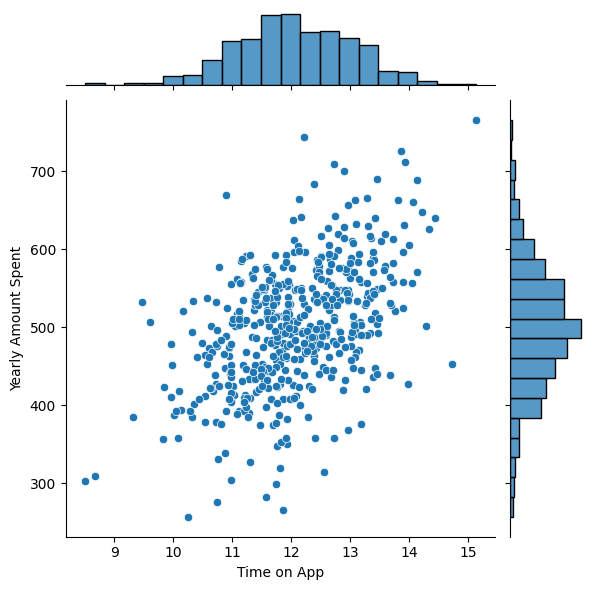

In [12]:
plt.figure(figsize=(4,6))
sns.jointplot(data= df, x= 'Time on App', y= 'Yearly Amount Spent')
plt.show()

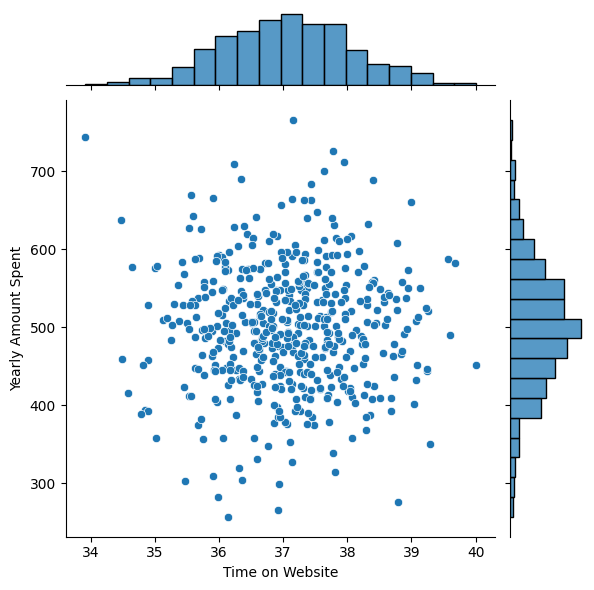

In [7]:
sns.jointplot(data= df, x= 'Time on Website', y= 'Yearly Amount Spent')

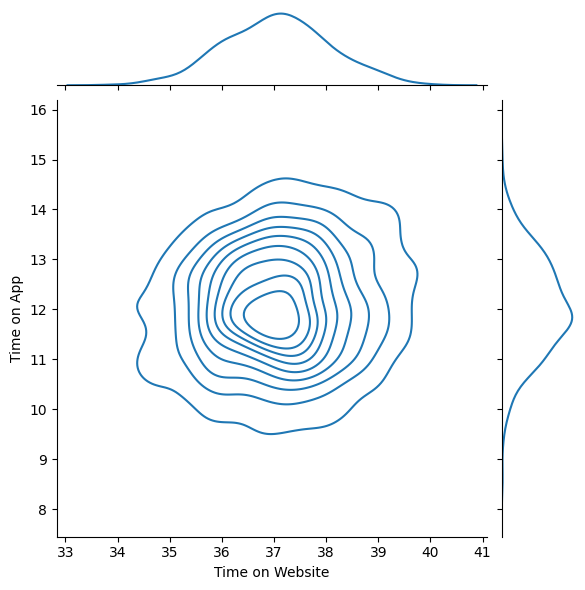

In [22]:
sns.jointplot(data= df, x= 'Time on Website', y= 'Time on App', kind= 'kde')

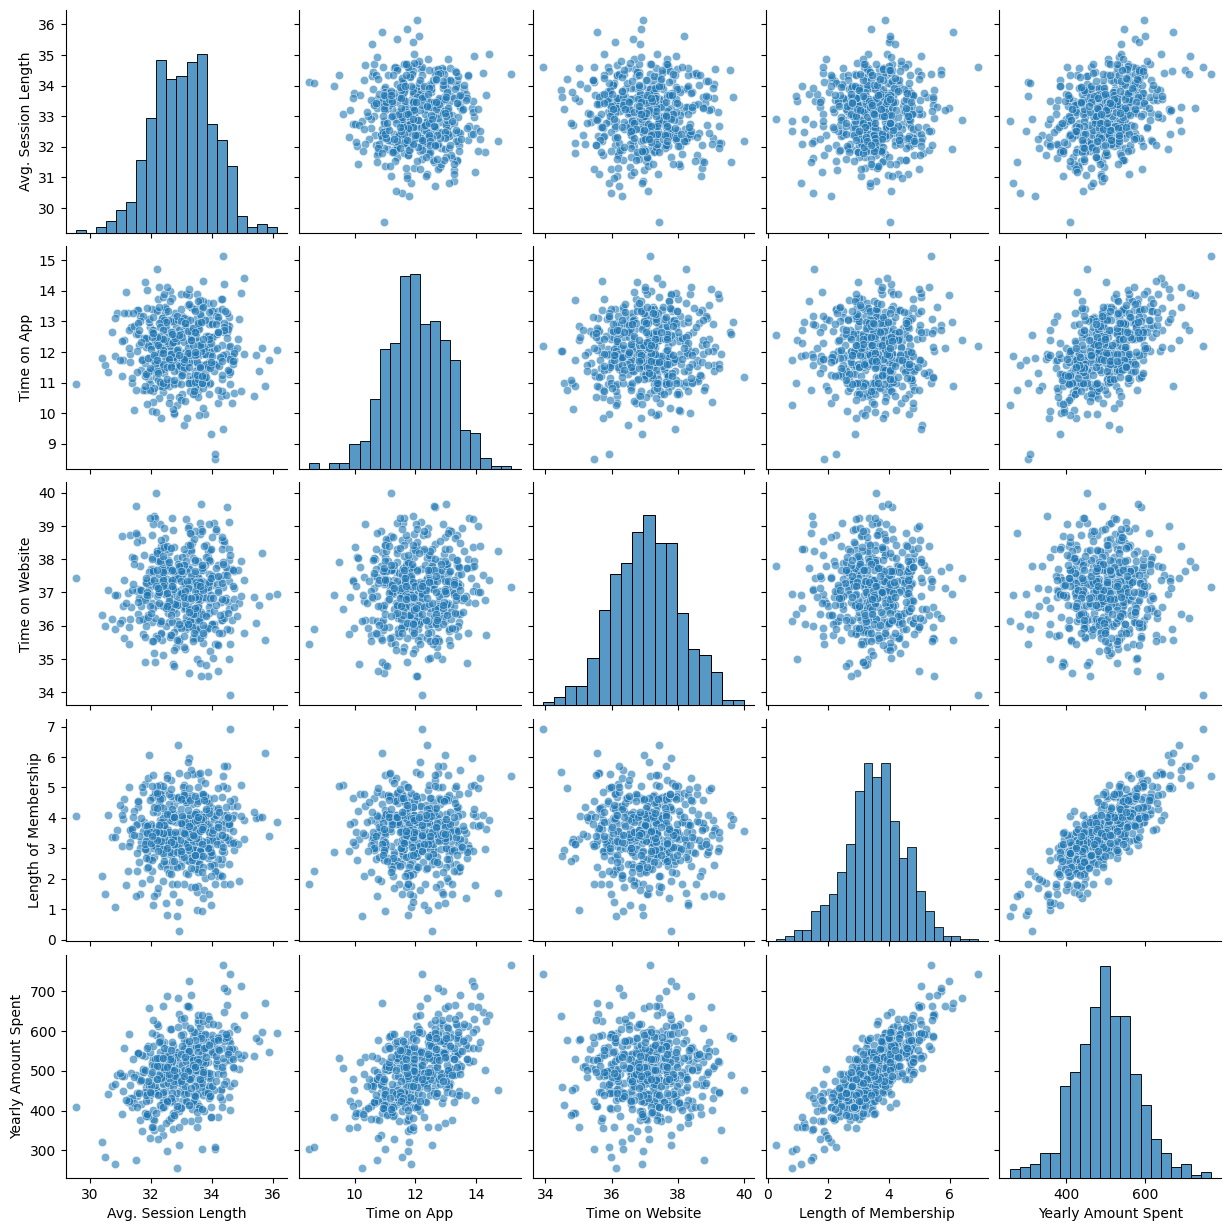

In [25]:
sns.pairplot(data= df, plot_kws= {'alpha' : 0.6})

<Axes: >

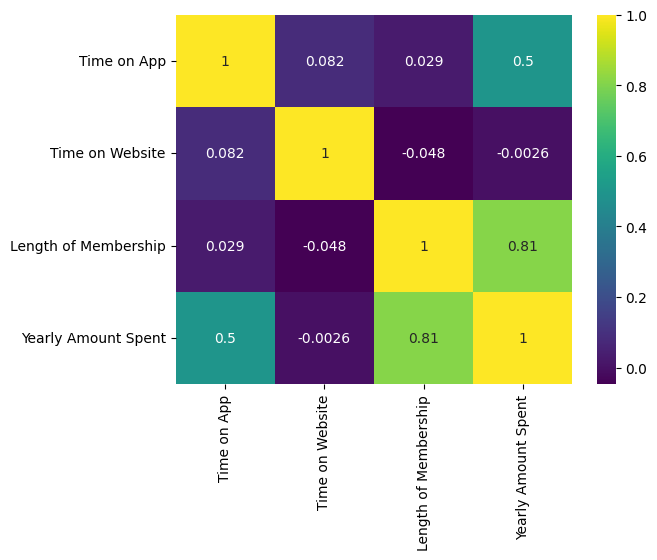

In [18]:
corr_df = df[['Time on App','Time on Website', 'Length of Membership', 'Yearly Amount Spent']]
corr_matrix = corr_df.corr()
sns.heatmap(data= corr_matrix, annot= True, cmap= 'viridis')

In [19]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

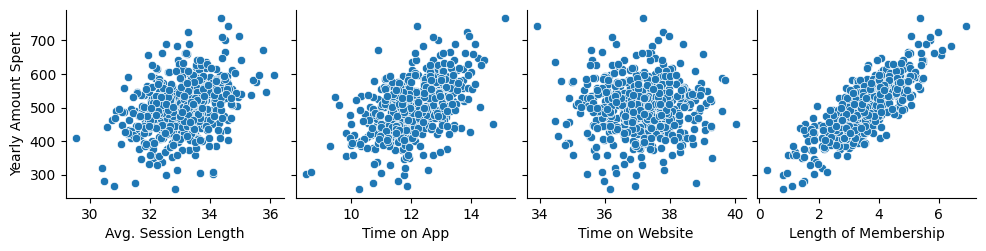

In [20]:
sns.pairplot(data= df, x_vars= ['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'],
                        y_vars=['Yearly Amount Spent'])

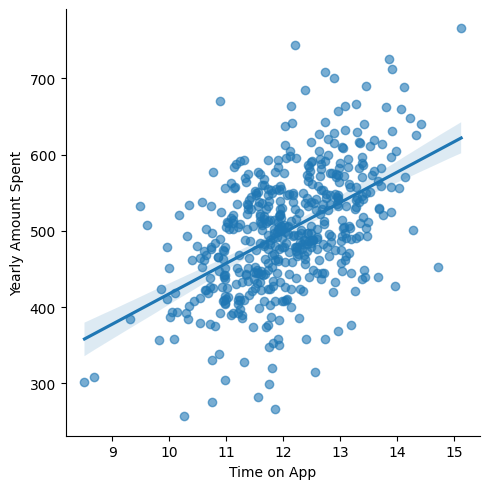

In [28]:
sns.lmplot(data= df, x= 'Time on App', y= 'Yearly Amount Spent', scatter_kws= {'alpha' :0.6})

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [38]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X= X_train, y= y_train)

LinearRegression()

In [40]:
regressor.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [42]:
cdf = pd.DataFrame(regressor.coef_, X.columns, columns= ['Coefficient'])
cdf

,Coefficient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732
